In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../lung_pollution/data/covid_pollution_complete.csv')

In [5]:

X = df[['NO2_totMean', 'NO_totMean', 'O3_totMean','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y = df[['cases_per_100k']]


In [13]:
X_train = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_poll = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_vaxx = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y_train = df[['cases_per_100k']]
print(X_train.shape)
print(X_test_poll.shape)
print(X_test_vaxx.shape)
print(y_train.shape)


(4370, 6)
(4370, 6)
(4370, 6)
(4370, 1)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X_train)  # Fit scaler to feature
scaled_num = scaler.transform(X_train)  #Scale
X_train = pd.DataFrame(scaled_num, columns = X_train.columns)

In [20]:
X_test_poll['PM2_5_totMean'] = 5
X_test_poll['NO2_totMean'] = 10
X_test_poll['O3_daily8HrMax'] = 100
X_test_vaxx['fully_vaccinated'] = 1
scaled_test_poll = scaler.transform(X_test_poll)
scaled_test_vaxx = scaler.transform(X_test_vaxx)

/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_poll['PM2_5_totMean'] = 5
/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_poll['NO2_totMean'] = 10
/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [21]:
from sklearn.ensemble import  RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=201)

forest.fit(X_train,y_train)

print('R2 RandomForest: ', forest.score(X_train,y_train))

/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/1206131868.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


R2 RandomForest:  0.9999512921534439


In [22]:
y_pred_poll = forest.predict(scaled_test_poll)
y_pred_vaxx = forest.predict(scaled_test_vaxx)

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [23]:
# now we want to create a df to plot kde

In [24]:
# we want to plot y_train and y_pred_vaxx
#we also want to plot y_train and y_pred_poll

In [25]:
#we need to create a df where y_pred and 

In [34]:

dfk= y_train.copy()

In [38]:
dfk['y_pred_poll'] = y_pred_poll
dfk['y_pred_vaxx'] = y_pred_vaxx

In [40]:
dfk

,cases_per_100k,y_pred_poll,y_pred_vaxx
0,6640.688066,5830.619859,6357.748360
1,6640.688066,5830.619859,6357.748360
2,6640.688066,5830.619859,6358.542254
3,6640.688066,5830.619859,6410.327155
4,6640.688066,5830.619859,6346.747786
...,...,...,...
4365,6090.569875,5606.864922,6012.799008
4366,6090.569875,5606.864922,6012.819450
4367,6090.569875,5606.864922,6012.819450
4368,6090.569875,5606.864922,6012.819450


/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/792183934.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


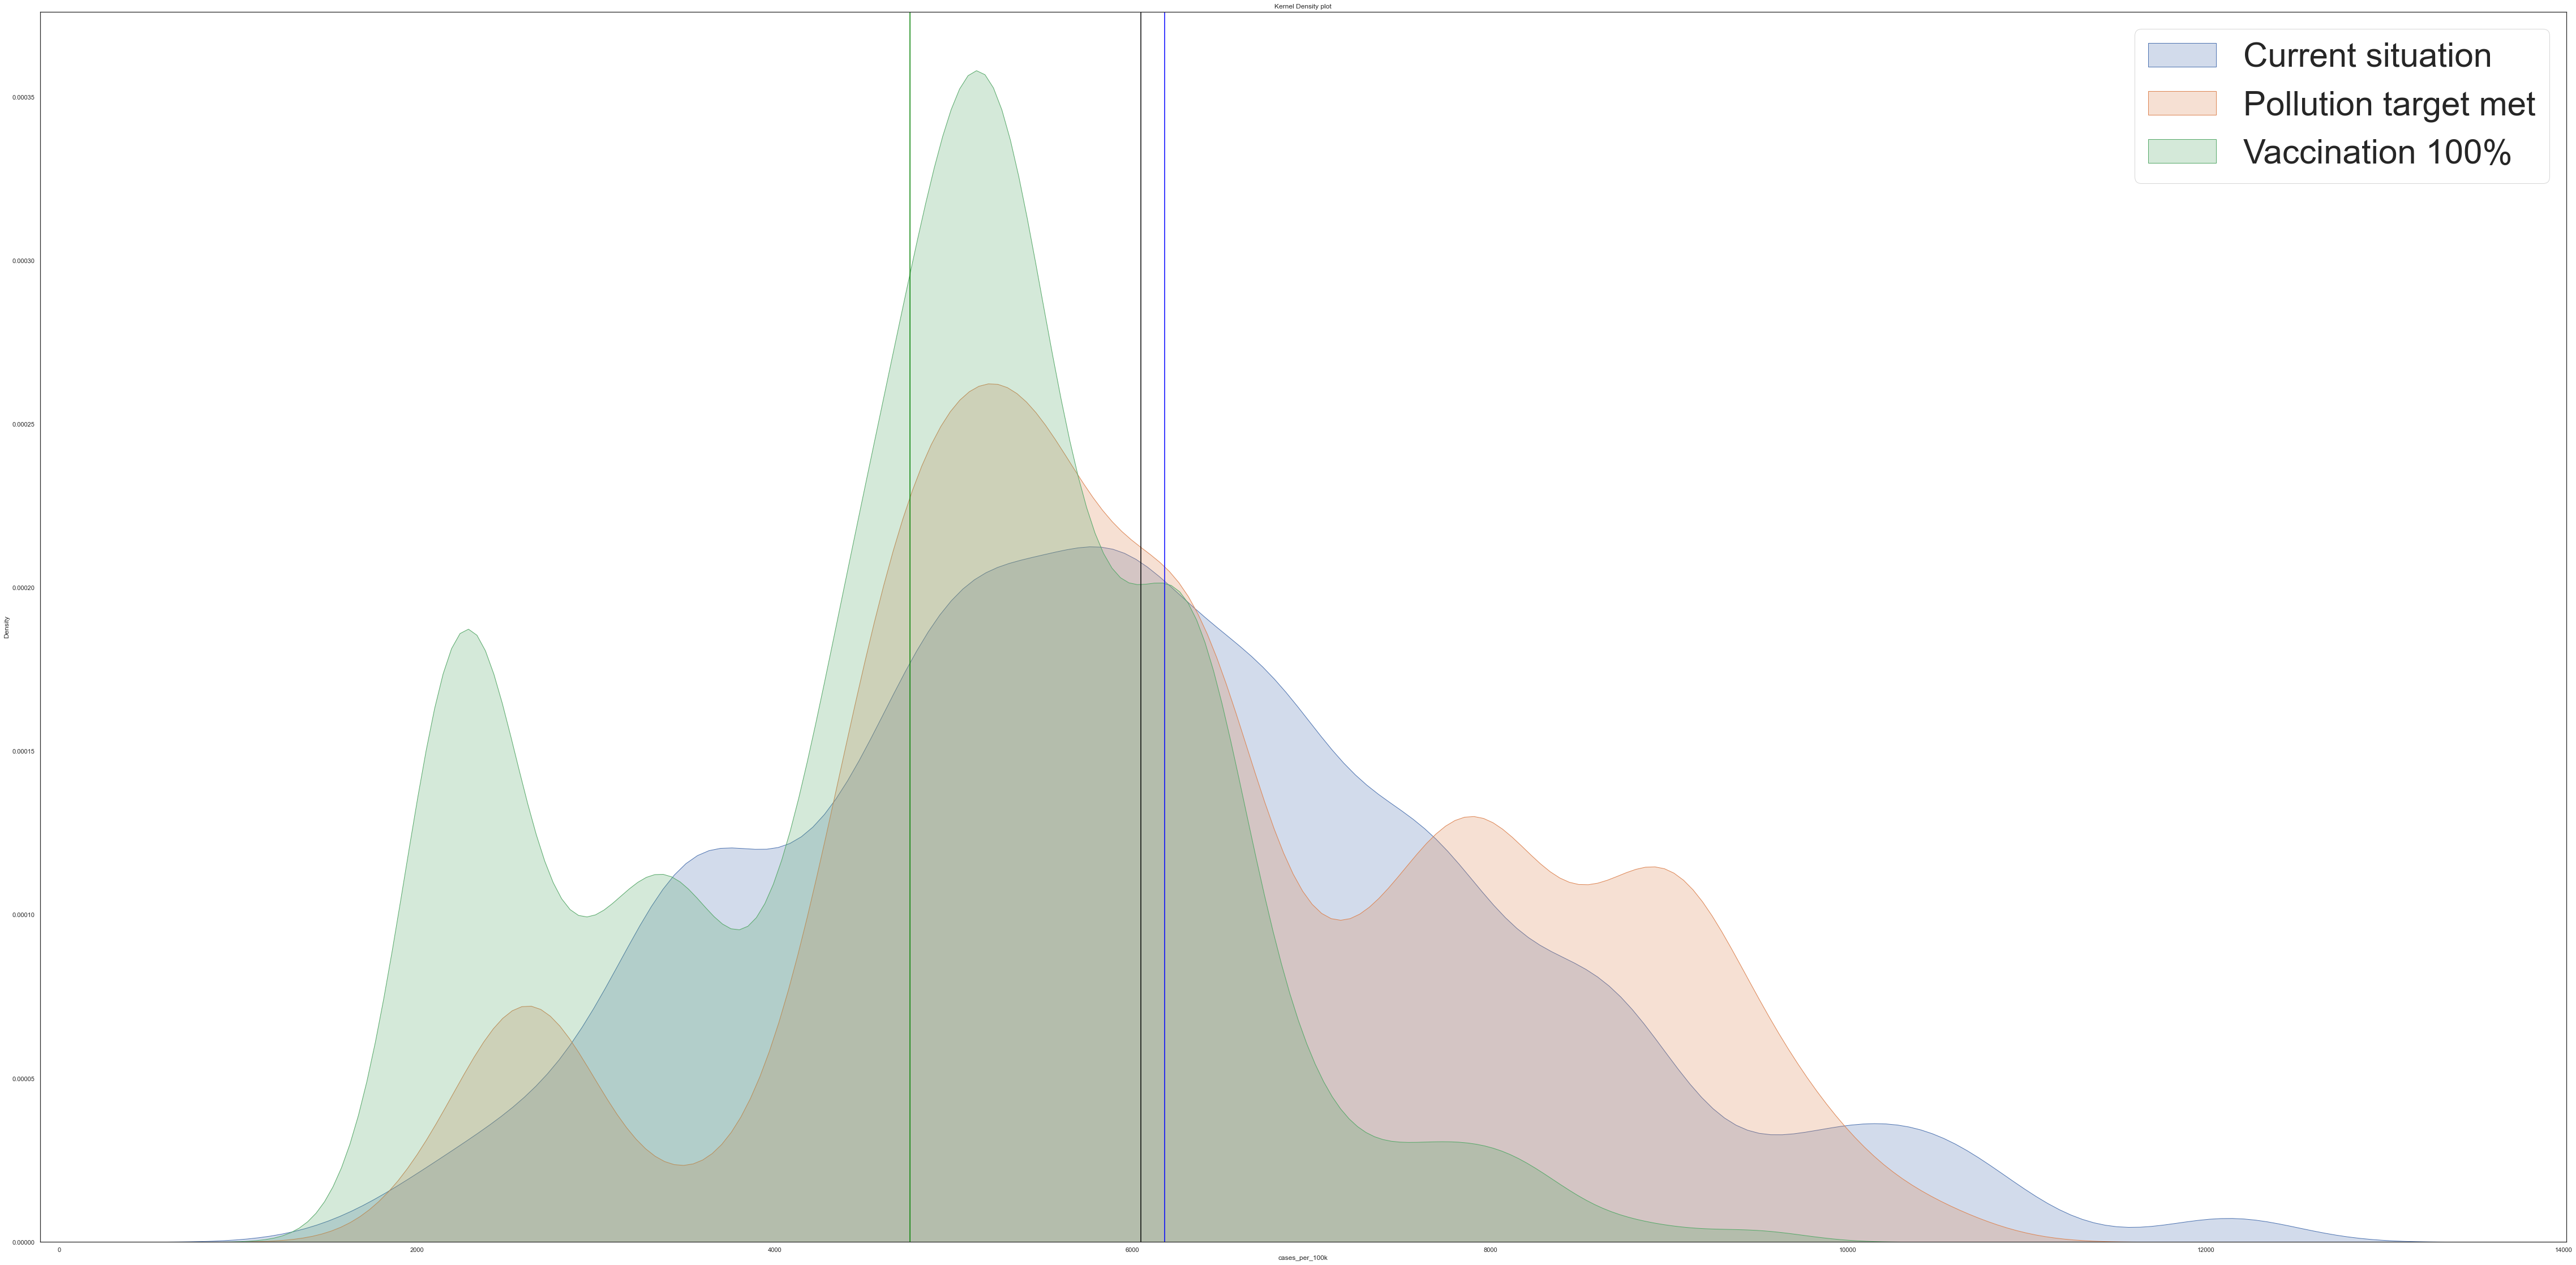

In [191]:
sns.set(style="white")
plt.figure(figsize=(80,40)) 
plt.gca(title='Kernel Density plot')

plt.legend(labels=['current situation','Pollution target met','Vaccination 100%'],loc=1)

sns.kdeplot(data=dfk, x='cases_per_100k',fill=True, label='Current situation') #blue
plt.axvline(x=dfk['cases_per_100k'].mean(),
            color='black')
sns.kdeplot(data=dfk, x='y_pred_poll' ,fill=True,  label='Pollution target met')
plt.axvline(x=dfk['y_pred_poll'].mean(),
            color='blue')#orange 
sns.kdeplot(data=dfk, x='y_pred_vaxx',fill=True, label='Vaccination 100%')
plt.axvline(x=dfk['y_pred_vaxx'].mean(),
            color='green')
plt.legend(fontsize='60')